<a href="https://colab.research.google.com/github/EllaC12345/Machine-Learning/blob/main/Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pathlib import Path
from sklearn.cluster import KMeans, AgglomerativeClustering,Birch
#!pip install matplotlib-venn
from sklearn.preprocessing import StandardScaler
import seaborn as sns
!pip install hvplot
import hvplot.pandas
#!pip install hvplot
#!pip install pycaret

from bokeh.io import output_notebook
import plotly.express as px


In [ ]:
pip install --upgrade pycaret

In [ ]:
#!pip uninstall scipy

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
!pip install pycaret



# Clustering & PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Machine Learning
import pycaret.classification as clf
from xgboost import plot_importance

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving apartments_for_rent_classified_10K.csv to apartments_for_rent_classified_10K.csv


In [ ]:
## Read the csv files
file_name = list(uploaded.keys())[0]
rent_df = pd.read_csv(file_name, sep=";", encoding="latin-1")


In [ ]:
rent_df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


In [ ]:
## Create distinct  appartemnt types based on the number of bedrooms and bathrooms

rent_df["apartmemt Category"] = rent_df['bedrooms'].astype(str) + ' BR ' + rent_df['bathrooms'].astype(str) + ' BA'
rent_df

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_type,square_feet,address,cityname,state,latitude,longitude,source,time,apartmemt Category
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415,0.0 BR nan BA
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063,1.0 BR nan BA
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410,0.0 BR 1.0 BA
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743,0.0 BR 1.0 BA
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401,0.0 BR nan BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5630240092,housing/rent/apartment,Five BR 5407 Abbott Place - Abbott,This unit is located at 5407 Abbott Place - Ab...,NaN,4.0,5.0,USD,No,Thumbnail,...,Monthly,6300,5407 Abbott Place Abbott,Edina,MN,44.9000,-93.3233,RentLingo,1575112975,5.0 BR 4.0 BA
9996,5668640983,housing/rent/apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Mont...",NaN,8.0,6.0,USD,No,Thumbnail,...,Monthly,8716,256 Las Entradas,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419,6.0 BR 8.0 BA
9997,5668643292,housing/rent/apartment,Six BR 9908 Bentcross Drive,"This unit is located at 9908 Bentcross Drive, ...",NaN,8.5,6.0,USD,No,Thumbnail,...,Monthly,11318,9908 Bentcross Dr,Potomac,MD,39.0287,-77.2409,RentLingo,1577360560,6.0 BR 8.5 BA
9998,5668662559,housing/rent/apartment,One BR in New York NY 10069,"Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...","Basketball,Cable or Satellite,Doorman,Hot Tub,...",NaN,1.0,USD,No,Thumbnail,...,Monthly,40000,NaN,New York,NY,40.7716,-73.9876,Listanza,1577362186,1.0 BR nan BA


In [ ]:
## Summary of columns in the dataset
rent_df.columns

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time',
       'apartmemt Category'],
      dtype='object')

In [ ]:
## removing missing values
rent_df.dropna()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_type,square_feet,address,cityname,state,latitude,longitude,source,time,apartmemt Category
8,5668610290,housing/rent/apartment,Studio apartment 333 Hyde St,"This unit is located at 333 Hyde St, San Franc...",Refrigerator,1.0,0.0,USD,No,Thumbnail,...,Monthly,138,333 Hyde St,San Francisco,CA,37.7599,-122.4379,RentLingo,1577358313,0.0 BR 1.0 BA
14,5664571820,housing/rent/apartment,Studio apartment 57 Taylor Street,"This unit is located at 57 Taylor Street, San ...",Refrigerator,1.0,0.0,USD,No,Thumbnail,...,Monthly,190,57 Taylor St,San Francisco,CA,37.7599,-122.4379,RentLingo,1577015121,0.0 BR 1.0 BA
16,5654898031,housing/rent/apartment,Studio Cottage 214,"New Bern Studio includes : 1 bedrooms, 1 micro...","AC,Basketball,Cable or Satellite,Gym,Internet ...",1.0,1.0,USD,No,Thumbnail,...,Monthly,200,180 Moonlight Lake Drive,New Bern,NC,35.0960,-77.0272,RentDigs.com,1576406273,1.0 BR 1.0 BA
21,5668622178,housing/rent/apartment,One BR 501 Chapel Drive,"This unit is located at 501 Chapel Drive, Tall...","Cable or Satellite,Clubhouse,Elevator,Internet...",1.0,1.0,USD,No,Thumbnail,...,Monthly,200,501 Chapel Dr,Tallahassee,FL,30.4601,-84.2714,RentLingo,1577359108,1.0 BR 1.0 BA
40,5668625234,housing/rent/apartment,Studio apartment 420 W. Fullerton Pkwy,"This unit is located at 420 W. Fullerton Pkwy,...","Cable or Satellite,Dishwasher,Internet Access,...",1.0,1.0,USD,No,Thumbnail,...,Monthly,225,420 W Fullerton Parkway,Chicago,IL,41.8625,-87.6825,RentLingo,1577359301,1.0 BR 1.0 BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,5659898574,housing/rent/apartment,Five BR 55 West 10th Avenue,"This unit is located at 55 West 10th Avenue, C...","Dishwasher,Parking,Patio/Deck,Refrigerator",4.0,5.0,USD,No,Thumbnail,...,Monthly,4736,55 West 10th Ave,Columbus,OH,39.9974,-82.9829,RentLingo,1576666449,5.0 BR 4.0 BA
9986,5668626631,housing/rent/apartment,Five BR 757 N Saint Andrews St,This unit is located at 757 N Saint Andrews St...,"Dishwasher,Internet Access,Refrigerator",5.0,5.0,USD,No,Thumbnail,...,Monthly,4741,757 N Saint Andrews St,Wichita,KS,37.6836,-97.3369,RentLingo,1577359388,5.0 BR 5.0 BA
9988,5668616326,housing/rent/apartment,Eight BR 46 N Breese Terrace,"This unit is located at 46 N Breese Terrace, M...","Dishwasher,Fireplace,Garbage Disposal,Parking,...",4.0,8.0,USD,No,Thumbnail,...,Monthly,4900,46 N Breese Terrace,Madison,WI,43.0724,-89.4003,RentLingo,1577358721,8.0 BR 4.0 BA
9990,5659901599,housing/rent/apartment,Four BR 864 Teakwood Rd,"This unit is located at 864 Teakwood Rd, Los A...","Dishwasher,Parking,Pool,Refrigerator",5.0,4.0,USD,No,Thumbnail,...,Monthly,5000,864 Teakwood Road,Los Angeles,CA,34.0372,-118.2972,RentLingo,1576666648,4.0 BR 5.0 BA


In [ ]:
## converting datatype for certain fields
columns_to_convert = ['id',  'price',  'square_feet']
rent_df[columns_to_convert] = rent_df[columns_to_convert].values.astype(np.float64)


In [ ]:
## Data exploration
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  10000 non-null  float64
 1   category            10000 non-null  object 
 2   title               10000 non-null  object 
 3   body                10000 non-null  object 
 4   amenities           6451 non-null   object 
 5   bathrooms           9966 non-null   float64
 6   bedrooms            9993 non-null   float64
 7   currency            10000 non-null  object 
 8   fee                 10000 non-null  object 
 9   has_photo           10000 non-null  object 
 10  pets_allowed        8252 non-null   object 
 11  price               10000 non-null  float64
 12  price_display       10000 non-null  object 
 13  price_type          10000 non-null  object 
 14  square_feet         10000 non-null  float64
 15  address             6673 non-null   object 
 16  cityn

In [ ]:
## Other dataProfiling
def profile_data(rent_df):
    """Panda Profiling Function

    Args:
        data (DataFrame): A data frame to profile

    Returns:
        DataFrame: A data frame with profiled data
    """
    return pd.concat(
        [
            pd.Series(rent_df.dtypes, name = "Dtype"),
            # Counts
            pd.Series(rent_df.count(), name = "Count"),
            pd.Series(rent_df.isnull().sum(), name = "NA Count"),
            pd.Series(rent_df.nunique(), name = "Count Unique"),
            # Stats
            pd.Series(rent_df.min(), name = "Min"),
            pd.Series(rent_df.max(), name = "Max"),
            pd.Series(rent_df.mean(), name = "Mean"),
            pd.Series(rent_df.median(), name = "Median"),
            pd.Series(rent_df.mode().iloc[0], name = "Mode"),
        ],
        axis=1
    )


In [ ]:
profile_data(rent_df)

,Dtype,Count,NA Count,Count Unique,Min,Max,Mean,Median,Mode
id,float64,10000,0,10000,5508654087.0,5668662559.0,5.623396e+09,5.668610e+09,5508654087.0
category,object,10000,0,3,housing/rent/apartment,housing/rent/short_term,NaN,NaN,housing/rent/apartment
title,object,10000,0,9350,"$1,010 / Two BR - Great Deal. MUST SEE. Pet OK!","wood Apartments for rent in Colorado Springs, ...",NaN,NaN,Apartment in great location
body,object,10000,0,9961,! ACT NOW! 1 mon FREE RENT! NO SECURITY DEPOSI...,youll find all the casual sophistication you a...,NaN,NaN,"When searching for a pet-friendly One-, Two- a..."
amenities,object,6451,3549,2254,NaN,NaN,NaN,NaN,Parking
bathrooms,float64,9966,34,14,1.0,8.5,1.380544e+00,1.000000e+00,1.0
bedrooms,float64,9993,7,10,0.0,9.0,1.744021e+00,2.000000e+00,1.0
currency,object,10000,0,1,USD,USD,NaN,NaN,USD
fee,object,10000,0,1,No,No,NaN,NaN,No
has_photo,object,10000,0,3,No,Yes,NaN,NaN,Thumbnail


In [ ]:
profile_df = profile_data(rent_df)

In [ ]:
unique_amenities= list(rent_df['amenities'].unique())

print (unique_amenities)



[nan, 'Dishwasher,Elevator,Patio/Deck,Pool,Storage', 'Refrigerator', 'AC,Basketball,Cable or Satellite,Gym,Internet Access,Patio/Deck,Pool,Refrigerator', 'Pool', 'Cable or Satellite,Clubhouse,Elevator,Internet Access,Parking,Pool,Refrigerator', 'Cable or Satellite,Dishwasher,Internet Access,Parking,Refrigerator', 'Dishwasher,Refrigerator', 'Dishwasher', 'Cable or Satellite,Internet Access,Parking,Refrigerator', 'Internet Access,Parking,Refrigerator', 'Cable or Satellite,Dishwasher,Garbage Disposal,Parking,Refrigerator', 'Parking,Storage', 'Dishwasher,Fireplace,Garbage Disposal,Parking,Patio/Deck,Refrigerator', 'Cable or Satellite,Internet Access,Parking,Patio/Deck,Refrigerator,Storage', 'Cable or Satellite,Refrigerator', 'AC,Cable or Satellite,Internet Access,Parking,Storage,Washer Dryer', 'Basketball,Cable or Satellite,Dishwasher,Playground,Pool,Refrigerator', 'Cable or Satellite,Internet Access,Parking,Patio/Deck,Refrigerator', 'Cable or Satellite,Internet Access,Refrigerator', 'Cabl

In [ ]:
amenities_df = rent_df['amenities'].str.split(',').explode()
amenities_df.head()

# Count the occurrences of each amenity
amenities_counts = amenities_df.value_counts()

# Display the result
print(amenities_counts)

Parking               3727
Dishwasher            3266
Pool                  3238
Refrigerator          3133
Patio/Deck            2472
Cable or Satellite    1678
Storage               1531
Gym                   1469
Internet Access       1441
Clubhouse             1317
Garbage Disposal      1210
Washer Dryer          1077
Fireplace             1065
Playground             782
AC                     662
Elevator               642
Tennis                 482
Gated                  473
Wood Floors            357
Hot Tub                346
Basketball             318
TV                     207
View                   149
Doorman                 29
Alarm                   23
Golf                    23
Luxury                  11
Name: amenities, dtype: int64


In [ ]:
## removing missing values
rent_df.dropna()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_type,square_feet,address,cityname,state,latitude,longitude,source,time,apartmemt Category
8,5.668610e+09,housing/rent/apartment,Studio apartment 333 Hyde St,"This unit is located at 333 Hyde St, San Franc...",Refrigerator,1.0,0.0,USD,No,Thumbnail,...,Monthly,138.0,333 Hyde St,San Francisco,CA,37.7599,-122.4379,RentLingo,1577358313,0.0 BR 1.0 BA
14,5.664572e+09,housing/rent/apartment,Studio apartment 57 Taylor Street,"This unit is located at 57 Taylor Street, San ...",Refrigerator,1.0,0.0,USD,No,Thumbnail,...,Monthly,190.0,57 Taylor St,San Francisco,CA,37.7599,-122.4379,RentLingo,1577015121,0.0 BR 1.0 BA
16,5.654898e+09,housing/rent/apartment,Studio Cottage 214,"New Bern Studio includes : 1 bedrooms, 1 micro...","AC,Basketball,Cable or Satellite,Gym,Internet ...",1.0,1.0,USD,No,Thumbnail,...,Monthly,200.0,180 Moonlight Lake Drive,New Bern,NC,35.0960,-77.0272,RentDigs.com,1576406273,1.0 BR 1.0 BA
21,5.668622e+09,housing/rent/apartment,One BR 501 Chapel Drive,"This unit is located at 501 Chapel Drive, Tall...","Cable or Satellite,Clubhouse,Elevator,Internet...",1.0,1.0,USD,No,Thumbnail,...,Monthly,200.0,501 Chapel Dr,Tallahassee,FL,30.4601,-84.2714,RentLingo,1577359108,1.0 BR 1.0 BA
40,5.668625e+09,housing/rent/apartment,Studio apartment 420 W. Fullerton Pkwy,"This unit is located at 420 W. Fullerton Pkwy,...","Cable or Satellite,Dishwasher,Internet Access,...",1.0,1.0,USD,No,Thumbnail,...,Monthly,225.0,420 W Fullerton Parkway,Chicago,IL,41.8625,-87.6825,RentLingo,1577359301,1.0 BR 1.0 BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,5.659899e+09,housing/rent/apartment,Five BR 55 West 10th Avenue,"This unit is located at 55 West 10th Avenue, C...","Dishwasher,Parking,Patio/Deck,Refrigerator",4.0,5.0,USD,No,Thumbnail,...,Monthly,4736.0,55 West 10th Ave,Columbus,OH,39.9974,-82.9829,RentLingo,1576666449,5.0 BR 4.0 BA
9986,5.668627e+09,housing/rent/apartment,Five BR 757 N Saint Andrews St,This unit is located at 757 N Saint Andrews St...,"Dishwasher,Internet Access,Refrigerator",5.0,5.0,USD,No,Thumbnail,...,Monthly,4741.0,757 N Saint Andrews St,Wichita,KS,37.6836,-97.3369,RentLingo,1577359388,5.0 BR 5.0 BA
9988,5.668616e+09,housing/rent/apartment,Eight BR 46 N Breese Terrace,"This unit is located at 46 N Breese Terrace, M...","Dishwasher,Fireplace,Garbage Disposal,Parking,...",4.0,8.0,USD,No,Thumbnail,...,Monthly,4900.0,46 N Breese Terrace,Madison,WI,43.0724,-89.4003,RentLingo,1577358721,8.0 BR 4.0 BA
9990,5.659902e+09,housing/rent/apartment,Four BR 864 Teakwood Rd,"This unit is located at 864 Teakwood Rd, Los A...","Dishwasher,Parking,Pool,Refrigerator",5.0,4.0,USD,No,Thumbnail,...,Monthly,5000.0,864 Teakwood Road,Los Angeles,CA,34.0372,-118.2972,RentLingo,1576666648,4.0 BR 5.0 BA


In [ ]:
# Remove leading and trailing spaces in the 'amenities' column
rent_df['amenities'] = rent_df['amenities'].str.strip()

# Split the 'amenities' column and explode the lists into separate rows
amenities_df = rent_df['amenities'].str.split(',').explode()

# Count the occurrences of each amenity
amenities_counts = amenities_df.value_counts()

# Display the result
print(amenities_counts)

Parking               3727
Dishwasher            3266
Pool                  3238
Refrigerator          3133
Patio/Deck            2472
Cable or Satellite    1678
Storage               1531
Gym                   1469
Internet Access       1441
Clubhouse             1317
Garbage Disposal      1210
Washer Dryer          1077
Fireplace             1065
Playground             782
AC                     662
Elevator               642
Tennis                 482
Gated                  473
Wood Floors            357
Hot Tub                346
Basketball             318
TV                     207
View                   149
Doorman                 29
Alarm                   23
Golf                    23
Luxury                  11
Name: amenities, dtype: int64


In [ ]:
## create categories of amenities to incorporate them into the analysis
outdoor = ['Patio/Deck', 'Clubhouse', 'Playground']
sports = ['Pool','Gym', 'Tennis', 'Basketball', 'Golf']
luxury = ['Fireplace', 'Wood Floors', 'View', 'Doorman', 'Luxury', 'Hot Tub']
convenience = ['Parking', 'Garbage Disposal', 'Washer Dryer', 'AC', 'Elevator', 'Dishwasher', 'Storage', 'Gated', 'Refrigerator','Cable or Satellite','Internet Access']

In [ ]:
# Convert the list to a regular expression pattern
pattern = '|'.join(outdoor)
pattern2 = '|'.join(sports)
pattern3 = '|'.join(luxury)
pattern4 = '|'.join(convenience)



In [ ]:
# Count the number of occurrences of items in the outdoor list in the 'amenities' column
rent_df['outdoor_count'] = rent_df['amenities'].str.count(pattern)
rent_df['sports_count'] = rent_df['amenities'].str.count(pattern2)
rent_df['luxury_count'] = rent_df['amenities'].str.count(pattern3)
rent_df['convenience_count'] = rent_df['amenities'].str.count(pattern4)




In [ ]:
# Count the number of occurrences of items in the outdoor list in the 'amenities' column
#lst = ['convenience']
#rent_df = rent_df.drop(lst, axis=1)





# Display the DataFrame with the new column
rent_df.tail()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,state,latitude,longitude,source,time,apartmemt Category,outdoor_count,sports_count,luxury_count,convenience_count
9995,5.630240e+09,housing/rent/apartment,Five BR 5407 Abbott Place - Abbott,This unit is located at 5407 Abbott Place - Ab...,NaN,4.0,5.0,USD,No,Thumbnail,...,MN,44.9000,-93.3233,RentLingo,1575112975,5.0 BR 4.0 BA,NaN,NaN,NaN,NaN
9996,5.668641e+09,housing/rent/apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Mont...",NaN,8.0,6.0,USD,No,Thumbnail,...,CA,34.4331,-119.6331,RentLingo,1577360419,6.0 BR 8.0 BA,NaN,NaN,NaN,NaN
9997,5.668643e+09,housing/rent/apartment,Six BR 9908 Bentcross Drive,"This unit is located at 9908 Bentcross Drive, ...",NaN,8.5,6.0,USD,No,Thumbnail,...,MD,39.0287,-77.2409,RentLingo,1577360560,6.0 BR 8.5 BA,NaN,NaN,NaN,NaN
9998,5.668663e+09,housing/rent/apartment,One BR in New York NY 10069,"Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...","Basketball,Cable or Satellite,Doorman,Hot Tub,...",NaN,1.0,USD,No,Thumbnail,...,NY,40.7716,-73.9876,Listanza,1577362186,1.0 BR nan BA,1.0,2.0,2.0,5.0
9999,5.509133e+09,housing/rent/apartment,Beautiful Lawrenceville Apartment for rent,"Square footage: 880 sq. feet, unit number: 150...","Gym,Patio/Deck",1.0,1.0,USD,No,No,...,GA,34.0072,-84.0034,RentDigs.com,1577362141,1.0 BR 1.0 BA,1.0,1.0,0.0,0.0


In [ ]:
rent_df.dropna()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,state,latitude,longitude,source,time,apartmemt Category,outdoor_count,sports_count,luxury_count,convenience_count
8,5.668610e+09,housing/rent/apartment,Studio apartment 333 Hyde St,"This unit is located at 333 Hyde St, San Franc...",Refrigerator,1.0,0.0,USD,No,Thumbnail,...,CA,37.7599,-122.4379,RentLingo,1577358313,0.0 BR 1.0 BA,0.0,0.0,0.0,1.0
14,5.664572e+09,housing/rent/apartment,Studio apartment 57 Taylor Street,"This unit is located at 57 Taylor Street, San ...",Refrigerator,1.0,0.0,USD,No,Thumbnail,...,CA,37.7599,-122.4379,RentLingo,1577015121,0.0 BR 1.0 BA,0.0,0.0,0.0,1.0
16,5.654898e+09,housing/rent/apartment,Studio Cottage 214,"New Bern Studio includes : 1 bedrooms, 1 micro...","AC,Basketball,Cable or Satellite,Gym,Internet ...",1.0,1.0,USD,No,Thumbnail,...,NC,35.0960,-77.0272,RentDigs.com,1576406273,1.0 BR 1.0 BA,1.0,3.0,0.0,4.0
21,5.668622e+09,housing/rent/apartment,One BR 501 Chapel Drive,"This unit is located at 501 Chapel Drive, Tall...","Cable or Satellite,Clubhouse,Elevator,Internet...",1.0,1.0,USD,No,Thumbnail,...,FL,30.4601,-84.2714,RentLingo,1577359108,1.0 BR 1.0 BA,1.0,1.0,0.0,5.0
40,5.668625e+09,housing/rent/apartment,Studio apartment 420 W. Fullerton Pkwy,"This unit is located at 420 W. Fullerton Pkwy,...","Cable or Satellite,Dishwasher,Internet Access,...",1.0,1.0,USD,No,Thumbnail,...,IL,41.8625,-87.6825,RentLingo,1577359301,1.0 BR 1.0 BA,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,5.659899e+09,housing/rent/apartment,Five BR 55 West 10th Avenue,"This unit is located at 55 West 10th Avenue, C...","Dishwasher,Parking,Patio/Deck,Refrigerator",4.0,5.0,USD,No,Thumbnail,...,OH,39.9974,-82.9829,RentLingo,1576666449,5.0 BR 4.0 BA,1.0,0.0,0.0,3.0
9986,5.668627e+09,housing/rent/apartment,Five BR 757 N Saint Andrews St,This unit is located at 757 N Saint Andrews St...,"Dishwasher,Internet Access,Refrigerator",5.0,5.0,USD,No,Thumbnail,...,KS,37.6836,-97.3369,RentLingo,1577359388,5.0 BR 5.0 BA,0.0,0.0,0.0,3.0
9988,5.668616e+09,housing/rent/apartment,Eight BR 46 N Breese Terrace,"This unit is located at 46 N Breese Terrace, M...","Dishwasher,Fireplace,Garbage Disposal,Parking,...",4.0,8.0,USD,No,Thumbnail,...,WI,43.0724,-89.4003,RentLingo,1577358721,8.0 BR 4.0 BA,1.0,0.0,1.0,5.0
9990,5.659902e+09,housing/rent/apartment,Four BR 864 Teakwood Rd,"This unit is located at 864 Teakwood Rd, Los A...","Dishwasher,Parking,Pool,Refrigerator",5.0,4.0,USD,No,Thumbnail,...,CA,34.0372,-118.2972,RentLingo,1576666648,4.0 BR 5.0 BA,0.0,1.0,0.0,3.0


In [ ]:
## coverting weekly rent prices into monthly
weekly = rent_df[rent_df['price_type'] == "Weekly"]
rent_df.loc[rent_df['price_type'] == 'Weekly', 'price'] *= 4



In [ ]:
## droping incomplete rows
rent_df = rent_df[rent_df['price_type']!= 'Monthly|Weekly' ]
weekly = rent_df[rent_df['price_type'] == "Weekly"]
weekly

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,state,latitude,longitude,source,time,apartmemt Category,outdoor_count,sports_count,luxury_count,convenience_count
15,5.659276e+09,housing/rent/apartment,Studio Cottage 214,"New Bern Studio includes : 1 beds, 1 microwave...","AC,Basketball,Cable or Satellite,Gym,Internet ...",1.0,1.0,USD,No,Thumbnail,...,NC,35.0847,-77.0609,ListedBuy,1576618076,1.0 BR 1.0 BA,1.0,3.0,0.0,4.0


In [ ]:
rent_df['price_type'].unique()

array(['Monthly', 'Weekly'], dtype=object)

In [ ]:
## Preprocessing #1 dropping unnecessary column for modeling
lst = ['currency','price_display','price_type','source','time']
rent_df = rent_df.drop(lst, axis=1)



In [ ]:
rent_df.dropna()

,id,category,title,body,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,...,address,cityname,state,latitude,longitude,apartmemt Category,outdoor_count,sports_count,luxury_count,convenience_count
8,5.668610e+09,housing/rent/apartment,Studio apartment 333 Hyde St,"This unit is located at 333 Hyde St, San Franc...",Refrigerator,1.0,0.0,No,Thumbnail,None,...,333 Hyde St,San Francisco,CA,37.7599,-122.4379,0.0 BR 1.0 BA,0.0,0.0,0.0,1.0
14,5.664572e+09,housing/rent/apartment,Studio apartment 57 Taylor Street,"This unit is located at 57 Taylor Street, San ...",Refrigerator,1.0,0.0,No,Thumbnail,None,...,57 Taylor St,San Francisco,CA,37.7599,-122.4379,0.0 BR 1.0 BA,0.0,0.0,0.0,1.0
16,5.654898e+09,housing/rent/apartment,Studio Cottage 214,"New Bern Studio includes : 1 bedrooms, 1 micro...","AC,Basketball,Cable or Satellite,Gym,Internet ...",1.0,1.0,No,Thumbnail,"Cats,Dogs",...,180 Moonlight Lake Drive,New Bern,NC,35.0960,-77.0272,1.0 BR 1.0 BA,1.0,3.0,0.0,4.0
21,5.668622e+09,housing/rent/apartment,One BR 501 Chapel Drive,"This unit is located at 501 Chapel Drive, Tall...","Cable or Satellite,Clubhouse,Elevator,Internet...",1.0,1.0,No,Thumbnail,None,...,501 Chapel Dr,Tallahassee,FL,30.4601,-84.2714,1.0 BR 1.0 BA,1.0,1.0,0.0,5.0
40,5.668625e+09,housing/rent/apartment,Studio apartment 420 W. Fullerton Pkwy,"This unit is located at 420 W. Fullerton Pkwy,...","Cable or Satellite,Dishwasher,Internet Access,...",1.0,1.0,No,Thumbnail,Cats,...,420 W Fullerton Parkway,Chicago,IL,41.8625,-87.6825,1.0 BR 1.0 BA,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,5.659899e+09,housing/rent/apartment,Five BR 55 West 10th Avenue,"This unit is located at 55 West 10th Avenue, C...","Dishwasher,Parking,Patio/Deck,Refrigerator",4.0,5.0,No,Thumbnail,"Cats,Dogs",...,55 West 10th Ave,Columbus,OH,39.9974,-82.9829,5.0 BR 4.0 BA,1.0,0.0,0.0,3.0
9986,5.668627e+09,housing/rent/apartment,Five BR 757 N Saint Andrews St,This unit is located at 757 N Saint Andrews St...,"Dishwasher,Internet Access,Refrigerator",5.0,5.0,No,Thumbnail,None,...,757 N Saint Andrews St,Wichita,KS,37.6836,-97.3369,5.0 BR 5.0 BA,0.0,0.0,0.0,3.0
9988,5.668616e+09,housing/rent/apartment,Eight BR 46 N Breese Terrace,"This unit is located at 46 N Breese Terrace, M...","Dishwasher,Fireplace,Garbage Disposal,Parking,...",4.0,8.0,No,Thumbnail,None,...,46 N Breese Terrace,Madison,WI,43.0724,-89.4003,8.0 BR 4.0 BA,1.0,0.0,1.0,5.0
9990,5.659902e+09,housing/rent/apartment,Four BR 864 Teakwood Rd,"This unit is located at 864 Teakwood Rd, Los A...","Dishwasher,Parking,Pool,Refrigerator",5.0,4.0,No,Thumbnail,"Cats,Dogs",...,864 Teakwood Road,Los Angeles,CA,34.0372,-118.2972,4.0 BR 5.0 BA,0.0,1.0,0.0,3.0


In [ ]:
## replacecing nan with 0
rent_df.fillna(0, inplace= True)

In [ ]:
bathrooms = rent_df['bathrooms'].unique()
bathrooms

array([0. , 1. , 1.5, 2. , 2.5, 3. , 4. , 3.5, 4.5, 5. , 7. , 5.5, 6. ,
       8. , 8.5])

In [ ]:
bedrooms = rent_df['bedrooms'].unique()
bedrooms

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [ ]:
fee = rent_df['fee'].unique()
fee

array(['No'], dtype=object)

In [ ]:
## encoding the Has_photo type
has_photo = rent_df['has_photo'].unique()
has_photo

array(['Thumbnail', 'Yes', 'No'], dtype=object)

In [ ]:
## encoding the photo type
def encode_photo(has_photo):
    """
    This function encodes photo by setting yes as 1 and no as 0.
    """
    if has_photo == "yes" or  has_photo == 'Thumbnail':
      return 1
    else:
        return 0

# Call the encode_fee function on the fee column
rent_df["has_photo"] = rent_df["has_photo"].apply(encode_photo)

# Review the DataFrame
rent_df.tail()

,id,category,title,body,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,...,address,cityname,state,latitude,longitude,apartmemt Category,outdoor_count,sports_count,luxury_count,convenience_count
9995,5.630240e+09,housing/rent/apartment,Five BR 5407 Abbott Place - Abbott,This unit is located at 5407 Abbott Place - Ab...,0,4.0,5.0,No,1,None,...,5407 Abbott Place Abbott,Edina,MN,44.9000,-93.3233,5.0 BR 4.0 BA,0.0,0.0,0.0,0.0
9996,5.668641e+09,housing/rent/apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Mont...",0,8.0,6.0,No,1,None,...,256 Las Entradas,Montecito,CA,34.4331,-119.6331,6.0 BR 8.0 BA,0.0,0.0,0.0,0.0
9997,5.668643e+09,housing/rent/apartment,Six BR 9908 Bentcross Drive,"This unit is located at 9908 Bentcross Drive, ...",0,8.5,6.0,No,1,None,...,9908 Bentcross Dr,Potomac,MD,39.0287,-77.2409,6.0 BR 8.5 BA,0.0,0.0,0.0,0.0
9998,5.668663e+09,housing/rent/apartment,One BR in New York NY 10069,"Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...","Basketball,Cable or Satellite,Doorman,Hot Tub,...",0.0,1.0,No,1,0,...,0,New York,NY,40.7716,-73.9876,1.0 BR nan BA,1.0,2.0,2.0,5.0
9999,5.509133e+09,housing/rent/apartment,Beautiful Lawrenceville Apartment for rent,"Square footage: 880 sq. feet, unit number: 150...","Gym,Patio/Deck",1.0,1.0,No,0,0,...,0,Lawrenceville,GA,34.0072,-84.0034,1.0 BR 1.0 BA,1.0,1.0,0.0,0.0


In [ ]:
## encoding the fee type
def encode_fee(fee):
    """
    This function encodes fee status by setting yes as 1 and no as 0.
    """
    if fee == "yes":
        return 1
    else:
        return 0

# Call the encode_fee function on the fee column
rent_df["fee"] = rent_df["fee"].apply(encode_fee)

# Review the DataFrame
rent_df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,...,address,cityname,state,latitude,longitude,apartmemt Category,outdoor_count,sports_count,luxury_count,convenience_count
0,5.668627e+09,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",0,0.0,0.0,0,1,None,...,0,Washington,DC,38.9057,-76.9861,0.0 BR nan BA,0.0,0.0,0.0,0.0
1,5.664597e+09,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",0,0.0,1.0,0,1,None,...,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,1.0 BR nan BA,0.0,0.0,0.0,0.0
2,5.668627e+09,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",0,1.0,0.0,0,1,None,...,0,Arlington,VA,38.8910,-77.0816,0.0 BR 1.0 BA,0.0,0.0,0.0,0.0
3,5.659918e+09,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",0,1.0,0.0,0,1,None,...,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,0.0 BR 1.0 BA,0.0,0.0,0.0,0.0
4,5.668627e+09,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",0,0.0,0.0,0,1,None,...,0,Arlington,VA,38.8738,-77.1055,0.0 BR nan BA,0.0,0.0,0.0,0.0


In [ ]:
## encoding the pets_allowed type
pets_allowed = rent_df['pets_allowed'].unique()
pets_allowed

array(['None', 0, 'Cats,Dogs', 'Cats', 'Dogs'], dtype=object)

In [ ]:
## encoding the pet type
def encode_pet(pets_allowed):
    """
    This function encodes pet ownership status by setting yes as 1 and no as 0.
    """
    if pets_allowed == "Cats,Dogs" or pets_allowed == "Cats" or pets_allowed == "Dogs" :
        return 1
    else:
        return 0

# Call the encode_fee function on the fee column
rent_df["pets_allowed"] = rent_df["pets_allowed"].apply(encode_pet)

# Review the DataFrame
rent_df.tail()

,id,category,title,body,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,...,address,cityname,state,latitude,longitude,apartmemt Category,outdoor_count,sports_count,luxury_count,convenience_count
9995,5.630240e+09,housing/rent/apartment,Five BR 5407 Abbott Place - Abbott,This unit is located at 5407 Abbott Place - Ab...,0,4.0,5.0,0,1,0,...,5407 Abbott Place Abbott,Edina,MN,44.9000,-93.3233,5.0 BR 4.0 BA,0.0,0.0,0.0,0.0
9996,5.668641e+09,housing/rent/apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Mont...",0,8.0,6.0,0,1,0,...,256 Las Entradas,Montecito,CA,34.4331,-119.6331,6.0 BR 8.0 BA,0.0,0.0,0.0,0.0
9997,5.668643e+09,housing/rent/apartment,Six BR 9908 Bentcross Drive,"This unit is located at 9908 Bentcross Drive, ...",0,8.5,6.0,0,1,0,...,9908 Bentcross Dr,Potomac,MD,39.0287,-77.2409,6.0 BR 8.5 BA,0.0,0.0,0.0,0.0
9998,5.668663e+09,housing/rent/apartment,One BR in New York NY 10069,"Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...","Basketball,Cable or Satellite,Doorman,Hot Tub,...",0.0,1.0,0,1,0,...,0,New York,NY,40.7716,-73.9876,1.0 BR nan BA,1.0,2.0,2.0,5.0
9999,5.509133e+09,housing/rent/apartment,Beautiful Lawrenceville Apartment for rent,"Square footage: 880 sq. feet, unit number: 150...","Gym,Patio/Deck",1.0,1.0,0,0,0,...,0,Lawrenceville,GA,34.0072,-84.0034,1.0 BR 1.0 BA,1.0,1.0,0.0,0.0


In [ ]:
## creating a feature dataframe
feature_df = rent_df.drop(['id','address','cityname','state','body', 'title', 'category', 'amenities'], axis=1)

In [ ]:
feature_df.tail(10)

,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,latitude,longitude,apartmemt Category,outdoor_count,sports_count,luxury_count,convenience_count
9990,5.0,4.0,0,1,1,19500.0,5000.0,34.0372,-118.2972,4.0 BR 5.0 BA,0.0,1.0,0.0,3.0
9991,5.0,6.0,0,1,0,3200.0,5199.0,33.4072,-84.4523,6.0 BR 5.0 BA,0.0,0.0,0.0,0.0
9992,5.0,4.0,0,1,0,4500.0,5407.0,44.8653,-93.4749,4.0 BR 5.0 BA,0.0,0.0,0.0,0.0
9993,5.0,5.0,0,1,1,6900.0,5700.0,28.1253,-82.4468,5.0 BR 5.0 BA,0.0,1.0,0.0,2.0
9994,4.0,6.0,0,1,0,3000.0,5921.0,37.0835,-113.5823,6.0 BR 4.0 BA,0.0,0.0,0.0,0.0
9995,4.0,5.0,0,1,0,6000.0,6300.0,44.9000,-93.3233,5.0 BR 4.0 BA,0.0,0.0,0.0,0.0
9996,8.0,6.0,0,1,0,25000.0,8716.0,34.4331,-119.6331,6.0 BR 8.0 BA,0.0,0.0,0.0,0.0
9997,8.5,6.0,0,1,0,11000.0,11318.0,39.0287,-77.2409,6.0 BR 8.5 BA,0.0,0.0,0.0,0.0
9998,0.0,1.0,0,1,0,4790.0,40000.0,40.7716,-73.9876,1.0 BR nan BA,1.0,2.0,2.0,5.0
9999,1.0,1.0,0,0,0,1009.0,880.0,34.0072,-84.0034,1.0 BR 1.0 BA,1.0,1.0,0.0,0.0


In [ ]:
## Transform Apartment categories column with get dummies
category_transformed = pd.get_dummies(feature_df['apartmemt Category'])

## Display the transformed data
category_transformed.tail()



,0.0 BR 1.0 BA,0.0 BR 1.5 BA,0.0 BR nan BA,1.0 BR 1.0 BA,1.0 BR 1.5 BA,1.0 BR 2.0 BA,1.0 BR nan BA,2.0 BR 1.0 BA,2.0 BR 1.5 BA,2.0 BR 2.0 BA,...,6.0 BR 8.0 BA,6.0 BR 8.5 BA,7.0 BR 2.0 BA,7.0 BR 7.0 BA,8.0 BR 4.0 BA,9.0 BR 5.0 BA,nan BR 1.0 BA,nan BR 2.0 BA,nan BR 2.5 BA,nan BR 3.0 BA
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9999,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Concatenate the df_shopping_transformed and the card_dummies DataFrames
feature_df = pd.concat([feature_df, category_transformed], axis=1)

# Drop the original education column
feature_df = feature_df.drop(columns=['apartmemt Category', 'bathrooms','bedrooms'])

# Display the DataFrame
feature_df.head()

,fee,has_photo,pets_allowed,price,square_feet,latitude,longitude,outdoor_count,sports_count,luxury_count,...,6.0 BR 8.0 BA,6.0 BR 8.5 BA,7.0 BR 2.0 BA,7.0 BR 7.0 BA,8.0 BR 4.0 BA,9.0 BR 5.0 BA,nan BR 1.0 BA,nan BR 2.0 BA,nan BR 2.5 BA,nan BR 3.0 BA
0,0,1,0,790.0,101.0,38.9057,-76.9861,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,425.0,106.0,37.9680,-87.6621,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1390.0,107.0,38.8910,-77.0816,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,925.0,116.0,47.6160,-122.3275,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,880.0,125.0,38.8738,-77.1055,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
## apply the standard scaler to numerical data
## import the module
from sklearn.preprocessing import StandardScaler



In [ ]:
## scaling numerical columns
feature_df_scaled = StandardScaler().fit_transform(feature_df[["price", "square_feet", "latitude", "longitude"]])

# Review the scaled data
feature_df_scaled

array([[-6.46750837e-01, -1.28846158e+00,  2.21933869e-01,
         1.09603422e+00],
       [-9.85501504e-01, -1.28083642e+00,  5.50837957e-02,
         4.30159007e-01],
       [-8.99004241e-02, -1.27931139e+00,  2.19318217e-01,
         1.09007777e+00],
       ...,
       [ 8.82898702e+00,  1.58178228e+01,  2.43819929e-01,
         1.08014203e+00],
       [ 3.06558525e+00,  5.95587918e+01,  5.53943627e-01,
         1.28305434e+00],
       [-4.43500436e-01, -1.00461619e-01, -6.49682940e-01,
         6.58356614e-01]])

In [ ]:
## Create a dataframe of the scaled data
feature_df_scaled = pd.DataFrame(feature_df_scaled, columns=["price", "square_feet", "latitude", "longitude"])

## replace the original data with columns of information from the scaled Data
feature_df['price'] = feature_df_scaled["price"]
feature_df["square_feet"] = feature_df_scaled["square_feet"]
feature_df["latitude"] = feature_df_scaled["latitude"]
feature_df["longitude"] = feature_df_scaled["longitude"]

feature_df.head()

,fee,has_photo,pets_allowed,price,square_feet,latitude,longitude,outdoor_count,sports_count,luxury_count,...,6.0 BR 8.0 BA,6.0 BR 8.5 BA,7.0 BR 2.0 BA,7.0 BR 7.0 BA,8.0 BR 4.0 BA,9.0 BR 5.0 BA,nan BR 1.0 BA,nan BR 2.0 BA,nan BR 2.5 BA,nan BR 3.0 BA
0,0,1,0,-0.646751,-1.288462,0.221934,1.096034,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,-0.985502,-1.280836,0.055084,0.430159,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,-0.089900,-1.279311,0.219318,1.090078,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,-0.521459,-1.265586,1.771805,-1.731965,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,-0.563223,-1.251861,0.216258,1.088587,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
## replacing nan with o
feature_df.fillna(0, inplace= True)

In [ ]:
## Using the Elbow method to find k
# importing the KMeans module from SKLEArn
from sklearn.cluster import KMeans
from sklearn import __version__ as sklearn_version
from distutils.version import LooseVersion
from sklearn.cluster import KMeans



In [ ]:
#create a list to store inertia values of k
inertia = []
k = list(range(1,11))

In [ ]:
#Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
  k_model = KMeans(n_clusters=i, random_state =0)
  k_model.fit(feature_df)
  inertia.append(k_model.inertia_)


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7cb71aba7910>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/scipy.libs/libopenblasp-r0-23e5df77.3.21.dev.so: cannot open shared object file: No such file or directory


In [ ]:
## define the dataframe to hold the values for k and the corresponding inertia
elbow_data = {'k': k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,116020.613210
1,2,75911.872586
2,3,67639.369848
3,4,61981.870279
4,5,58680.822771


Text(0, 0.5, 'inertia')

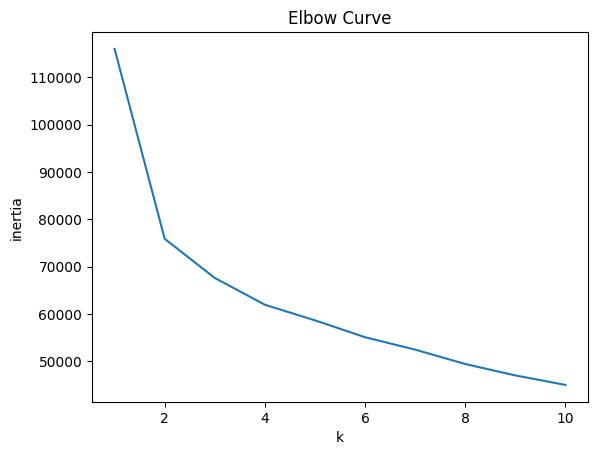

In [ ]:
## Plot the dataFrame
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.title("Elbow Curve")
plt.xlabel("k")
plt.ylabel('inertia')


In [ ]:
## Using KMeans to cluster the data
# Define the model with 2 clusters
model = KMeans(n_clusters=2, random_state=0)

# Fit the model
model.fit(feature_df)

# Make predictions
k_2 = model.predict(feature_df)

# Create a copy of the preprocessed data
feature_predictions_df = feature_df.copy()

# Add a class column with the labels
feature_predictions_df['rent_segments'] = k_2

feature_predictions_df.head()



,fee,has_photo,pets_allowed,price,square_feet,latitude,longitude,outdoor_count,sports_count,luxury_count,...,6.0 BR 8.5 BA,7.0 BR 2.0 BA,7.0 BR 7.0 BA,8.0 BR 4.0 BA,9.0 BR 5.0 BA,nan BR 1.0 BA,nan BR 2.0 BA,nan BR 2.5 BA,nan BR 3.0 BA,rent_segments
0,0,1,0,-0.646751,-1.288462,0.221934,1.096034,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,-0.985502,-1.280836,0.055084,0.430159,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,-0.089900,-1.279311,0.219318,1.090078,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,-0.521459,-1.265586,1.771805,-1.731965,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,-0.563223,-1.251861,0.216258,1.088587,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


<Axes: xlabel='square_feet', ylabel='price'>

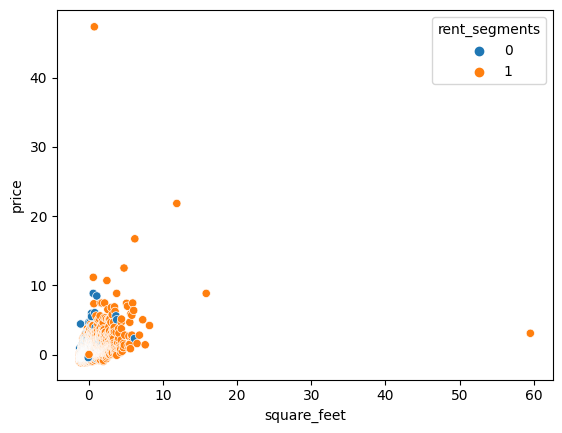

In [ ]:
# Plot the clusters


sns.scatterplot(x="square_feet", y = "price", data = feature_predictions_df, hue = "rent_segments")


Reperform the Clustering techniques using Principal Components Analysis (PCA).
In this section I will reduce the dimensionality of the transformed Feature DataFrame to 2 principal components

In [ ]:
## Reperforming Clustering using PCA method
# Instantiate the PCA instance and declare the number of PCA variables
pca=PCA(n_components=3)


In [ ]:
## Fit the PCA model on the transformed feature DataFrame
feature_pca = pca.fit_transform(feature_df)

feature_pca

array([[-1.9173258 , -1.62531476,  0.05738253],
       [-1.90424103, -1.67907519, -0.28560488],
       [-1.94318887, -1.2395838 ,  0.08011476],
       ...,
       [-6.37912674, 38.75657329, 21.12295761],
       [ 3.42398474, -0.38091015,  0.94077562],
       [-1.64678736, -0.31852879, -0.06759579]])

In [ ]:
## Using the explained_variance_ratio_ function from PCA, calculate the percentage of the total variance that is captured by the two PCA variables
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_


array([0.46545301, 0.12463263, 0.09835078])

About 69% of total variance is condensed into the **3** PCA variables

In [ ]:
# Creating the PCA DataFrame
feature_pca_df = pd.DataFrame(
    feature_pca,
    columns=["PCA1", "PCA2", "PCA3" ]
)

# Review the PCA DataFrame
feature_pca_df.head()

,PCA1,PCA2,PCA3
0,-1.917326,-1.625315,0.057383
1,-1.904241,-1.679075,-0.285605
2,-1.943189,-1.239584,0.080115
3,-1.933419,-0.526814,-2.818982
4,-1.923485,-1.543506,0.073548


In [ ]:
## reuse the elbow method to determine the optimal value of k using feature_pca_df
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

In [ ]:
# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(feature_pca_df)
    inertia.append(k_model.inertia_)

In [ ]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}

# Create the DataFrame from the elbow data
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,79872.815576
1,2,39782.423847
2,3,31584.838516
3,4,26154.506751
4,5,22378.961847


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
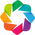

:Curve   [k]   (inertia)

In [ ]:
 # plot the elbow curve for pca_dataframe
 # Enable inline plotting in Google Colab
 import os
import holoviews as hv

os.environ['HV_DOC_HTML'] = 'true'
hv.extension('bokeh')

hv.Curve([1, 2, 3])
output_notebook()

df_elbow.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k
    )

using the PCA methodology the ideal amount of clusters remains at 2

In [ ]:
## Segment the `feature_pca_df`  DataFrame using the K-means algorithm.
# Define the model Kmeans model using the optimal value of k for the number of clusters.
model = KMeans(n_clusters=2, random_state=0)

# Fit the model
model.fit(feature_pca_df)

# Make predictions
k_2 = model.predict(feature_pca_df)

# Create a copy of the feature_pca_df DataFrame
feature_pca_predictions_df = feature_pca_df.copy()

# Add a class column with the labels
feature_pca_predictions_df["rent_segments"] = k_2


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
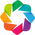

In [ ]:
## Plot the segments
import os
import holoviews as hv

os.environ['HV_DOC_HTML'] = 'true'
hv.extension('bokeh')

hv.Curve([1, 2, 3])
output_notebook()

px.scatter_3d(
    feature_pca_predictions_df,
    x = "PCA1",
    y = "PCA2",
    z = "PCA3",
    color = "rent_segments",
    template = "plotly_dark",
    title = "PCA Space",
    width = 800,
    height = 800
).update_traces(
    marker={
        'size': 3,
        'line': {
            'width': 1,
            'color': "white"
        }
    }
)


**Conclusion:**
Although the rentals are still segmented in the same amouunt of clusters. The PCA method provides a clearer distinction bewtween elements in each segment.

In [ ]:
## Leverage Machine Learning Library XGBoost to improve the clustering technique

## set up and configure the environment for training and evaluating the model
from pycaret.clustering import *

#s = setup(data, normalize = True, ignore_features = ['CUST_ID'], session_id = 145, silent = True)
clf.setup(
    data=feature_pca_predictions_df,
    target='rent_segments',
)


,Description,Value
0,Session id,652
1,Target,rent_segments
2,Target type,Binary
3,Original data shape,"(9999, 4)"
4,Transformed data shape,"(9999, 4)"
5,Transformed train set shape,"(6999, 4)"
6,Transformed test set shape,"(3000, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [ ]:
model_xgb = clf.create_model(
    'xgboost',
    cross_validation= False,
    verbose=True
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Test,0.9997,1.0000,0.9988,1.0000,0.9994,0.9992,0.9992


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
df_predictions = clf.predict_model(
        model_xgb,
        data=feature_pca_predictions_df,
        raw_score=False
    )

df_predictions


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9997,1.0000,0.9993,0.9996,0.9994,0.9992,0.9992


,PCA1,PCA2,PCA3,rent_segments,prediction_label,prediction_score
0,-1.917326,-1.625315,0.057383,0,0,1.0000
1,-1.904241,-1.679075,-0.285605,0,0,1.0000
2,-1.943189,-1.239584,0.080115,0,0,1.0000
3,-1.933419,-0.526814,-2.818982,0,0,0.9999
4,-1.923485,-1.543506,0.073548,0,0,1.0000
...,...,...,...,...,...,...
9994,-3.809199,22.707922,4.626267,0,0,0.9998
9995,-3.531421,15.547763,6.456012,0,0,0.9998
9996,-6.379127,38.756573,21.122957,0,0,0.9998
9997,3.423985,-0.380910,0.940776,1,1,0.9998


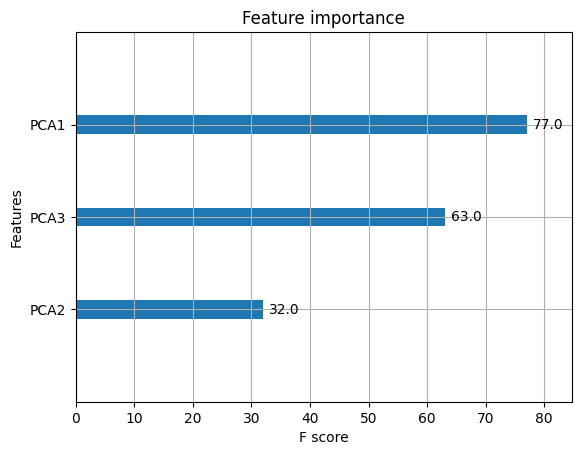

In [ ]:
# 5.0 FEATURE IMPORTANCE (TOP FEATURES) -----
#  * BENEFIT OF MACHINE LEARNING
try:
    plot_importance(model_xgb[len(model_xgb)-1])
except:
    plot_importance(model_xgb)

Athough the PCA method contributes to

<Axes: xlabel='PCA1', ylabel='PCA3'>

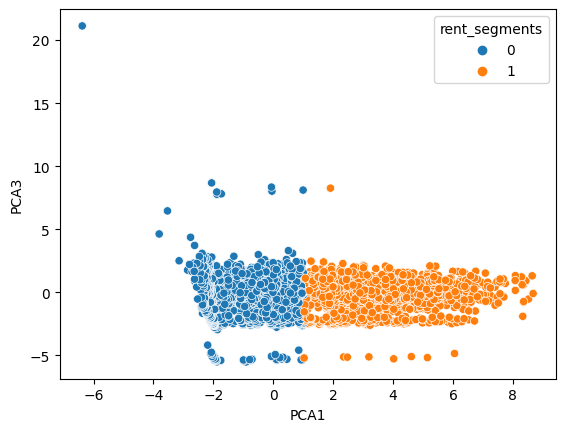

In [ ]:
# replot the segments
sns.scatterplot(x="PCA1", y = "PCA3", data = feature_pca_predictions_df, hue = "rent_segments")

In [ ]:
# reperform using feature_prediction model

clf.setup(
    data=feature_predictions_df,
    target='rent_segments',
)


,Description,Value
0,Session id,4348
1,Target,rent_segments
2,Target type,Binary
3,Original data shape,"(9999, 72)"
4,Transformed data shape,"(9999, 72)"
5,Transformed train set shape,"(6999, 72)"
6,Transformed test set shape,"(3000, 72)"
7,Numeric features,71
8,Preprocess,True
9,Imputation type,simple


In [ ]:
model_xgb = clf.create_model(
    'xgboost',
    cross_validation= False,
    verbose=True
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Test,0.9970,0.9999,0.9977,0.9982,0.9979,0.9924,0.9924


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
df_predictions = clf.predict_model(
        model_xgb,
        data=feature_predictions_df,
        raw_score=False
    )

df_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9991,1.0000,0.9993,0.9995,0.9994,0.9977,0.9977


,fee,has_photo,pets_allowed,price,square_feet,latitude,longitude,outdoor_count,sports_count,luxury_count,...,7.0 BR 7.0 BA,8.0 BR 4.0 BA,9.0 BR 5.0 BA,nan BR 1.0 BA,nan BR 2.0 BA,nan BR 2.5 BA,nan BR 3.0 BA,rent_segments,prediction_label,prediction_score
0,0,1,0,-0.646751,-1.288462,0.221934,1.096034,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0.9999
1,0,1,0,-0.985502,-1.280836,0.055084,0.430159,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0.9999
2,0,1,0,-0.089900,-1.279311,0.219318,1.090078,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,1.0000
3,0,1,0,-0.521460,-1.265586,1.771805,-1.731964,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0.9999
4,0,1,0,-0.563223,-1.251861,0.216258,1.088587,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,0,21.822163,11.849689,-0.573900,-1.563911,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,1.0000
9996,0,1,0,8.828987,15.817822,0.243820,1.080142,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,1.0000
9997,0,1,0,3.065585,59.558792,0.553944,1.283054,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,1.0000
9998,0,1,0,-0.443500,-0.100462,-0.649683,0.658357,1.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0.9997


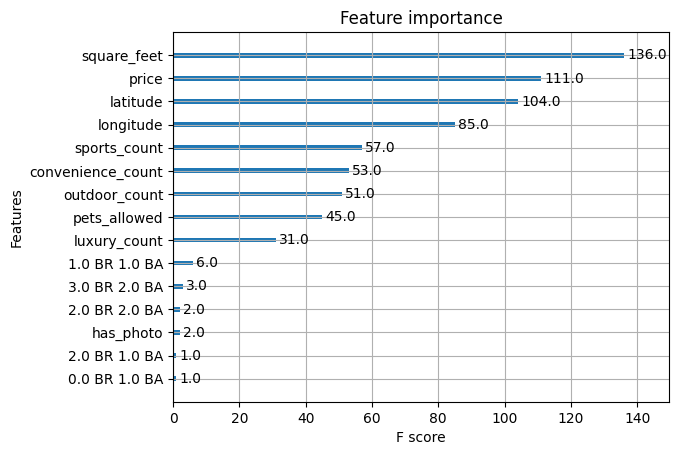

In [ ]:
# 5.0 FEATURE IMPORTANCE (TOP FEATURES) -----
#  * BENEFIT OF MACHINE LEARNING using feature dataframe is that we can see the most important features in the model and draw insights from each cluster.
try:
    plot_importance(model_xgb[len(model_xgb)-1])
except:
    plot_importance(model_xgb)

In [ ]:
## copy the prediction dataframe for further analysis. replace scaled numerical columns with original data
analysis_df = df_predictions
analysis_df[['latitude', 'square_feet','price','longitude']] = rent_df[['latitude', 'square_feet','price','longitude']]
analysis_df

,fee,has_photo,pets_allowed,price,square_feet,latitude,longitude,outdoor_count,sports_count,luxury_count,...,7.0 BR 7.0 BA,8.0 BR 4.0 BA,9.0 BR 5.0 BA,nan BR 1.0 BA,nan BR 2.0 BA,nan BR 2.5 BA,nan BR 3.0 BA,rent_segments,prediction_label,prediction_score
0,0,1,0,790.0,101.0,38.9057,-76.9861,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0.9999
1,0,1,0,425.0,106.0,37.9680,-87.6621,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0.9999
2,0,1,0,1390.0,107.0,38.8910,-77.0816,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,1.0000
3,0,1,0,925.0,116.0,47.6160,-122.3275,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0.9999
4,0,1,0,880.0,125.0,38.8738,-77.1055,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,0,6000.0,6300.0,44.9000,-93.3233,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,1.0000
9996,0,1,0,25000.0,8716.0,34.4331,-119.6331,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,1.0000
9997,0,1,0,11000.0,11318.0,39.0287,-77.2409,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,1.0000
9998,0,1,0,4790.0,40000.0,40.7716,-73.9876,1.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0.9997


In [ ]:
## Segment Analysis cluster insights Cluster0
cluster_0 = analysis_df[analysis_df['prediction_label']== 0]
median_rent_price = cluster_0['price'].median()
print(median_rent_price)
average_rent_price = cluster_0['price'].mean()
print(median_rent_price)
median_sqft = cluster_0['square_feet'].median()
print(median_sqft)
sports_count = cluster_0['sports_count'].median()
print(sports_count)
outdoor_count = cluster_0['outdoor_count'].median()
print(outdoor_count)
convenience_count = cluster_0['convenience_count'].median()
print(convenience_count)
luxury_count = cluster_0['luxury_count'].median()
print(luxury_count)



1173.0
1173.0
750.0
1.0
1.0
5.0
0.0


In [ ]:
## Segment Analysis cluster insights Cluster1
cluster_1 = analysis_df[analysis_df['prediction_label']== 1]
average_rent_price = cluster_1['price'].mean()
print(average_rent_price)
median_rent_price = cluster_1['price'].median()
print(median_rent_price)
median_sqft = cluster_1['square_feet'].median()
print(median_sqft)
sports_count = cluster_1['sports_count'].median()
print(sports_count)
outdoor_count = cluster_1['outdoor_count'].median()
print(outdoor_count)
convenience_count = cluster_1['convenience_count'].median()
print(convenience_count)
luxury_count = cluster_1['luxury_count'].median()
print(luxury_count)

1555.899945250479
1317.5
843.0
0.0
0.0
0.0
0.0


In [ ]:
pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 30.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pycaret 3.2.0 requires scipy~=1.10.1, but you have scipy 1.11.4 which is incompatible.


In [ ]:
print(analysis_df['longitude'].dtype)

float64


In [ ]:
snip_df = analysis_df[["latitude", "longitude", "prediction_label", "price","square_feet"]]
snip_df[['cityname', 'state']] = rent_df[['cityname', 'state']]
snip_df


,latitude,longitude,prediction_label,price,square_feet,cityname,state
0,38.9057,-76.9861,1,790.0,101.0,Washington,DC
1,37.9680,-87.6621,1,425.0,106.0,Evansville,IN
2,38.8910,-77.0816,1,1390.0,107.0,Arlington,VA
3,47.6160,-122.3275,1,925.0,116.0,Seattle,WA
4,38.8738,-77.1055,1,880.0,125.0,Arlington,VA
...,...,...,...,...,...,...,...
9995,44.9000,-93.3233,1,6000.0,6300.0,Edina,MN
9996,34.4331,-119.6331,1,25000.0,8716.0,Montecito,CA
9997,39.0287,-77.2409,1,11000.0,11318.0,Potomac,MD
9998,40.7716,-73.9876,0,4790.0,40000.0,New York,NY


In [ ]:
print(snip_df.dtypes)
snip_df[["cityname", "state"]] = snip_df[["cityname", "state"]].astype(str)

latitude            float64
longitude           float64
prediction_label      int64
price               float64
square_feet         float64
cityname             object
state                object
dtype: object


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
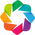

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (prediction_label,cityname,state)

In [ ]:
#!pip install holoviews
#!pip install cartopy
#!pip install geoviews
import holoviews as hv
from holoviews import opts

import geoviews as gv
#import geoviews.tile_sources as gvts
hv.extension("bokeh")
import cartopy.crs as ccrs

# Define the color mapping
color_mapping = {'0': 'blue', '1': 'orange'}

map_plot = snip_df.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 1000,
    frame_height = 800,
    size = "(square_feet)",
    color = "prediction_label",
    cmap=color_mapping,
    tools=['box_zoom'],
    hover_cols=["cityname", "state"],
)
# Display the plot in Colab
hv.output(notebook='bokeh')
map_plot

# Display the HTML file
#from IPython.display import HTML
#HTML(filename='map_plot.html')

